<a href="https://colab.research.google.com/github/sah72/a1-Data-Mining/blob/main/Competition3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CISC 451/839 Competition 3


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
path='./drive/My Drive/'

# Loading the data.
data = pd.read_excel(path+'Online Retail.xlsx')

#Initial shape of the data.
print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(541909, 8)


#Data Preparation

In [105]:
# Finds which columns have empty entries.
null_col = data.columns[data.isnull().any()]
#Prints the total amount of empty values in each columns.
print(data[null_col].isnull().sum())

#Removing all the rows that have empty entries.
data = data.dropna()
print(data.shape)

#Removing cancelled orders (negative in the Quantity column).
data = data[data['Quantity']>0]

#After this step about 26% of the data was removed.
print(data.shape)

Description      1454
CustomerID     135080
dtype: int64
(406829, 8)
(397924, 8)


In [106]:
#print(data.Country.value_counts())

data = data.drop(['StockCode','Description'], axis=1)
data['TotalPrice'] =  data['Quantity']* data['UnitPrice']


#Data Exploration

#RFM Analysis

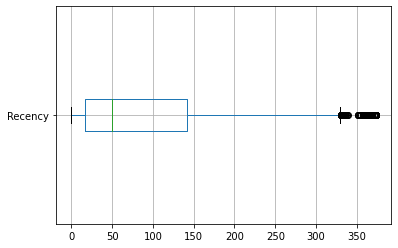

In [128]:
import datetime
present_date = datetime.datetime(2011,12,10)

data = data[data['Country']=='United Kingdom']

rfm = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present_date - date.max()).days,
                                      'InvoiceNo': lambda num: len(num),
                                      'TotalPrice': lambda price: price.sum()})
rfm.columns =['Recency','Frequency','Monetary']
rfm['Recency'] = rfm['Recency'].astype(int)

rfm.head()


#Plot the 

rfm.boxplot(column=['Recency'], vert=False)
#print(rfm['Recency'].describe())



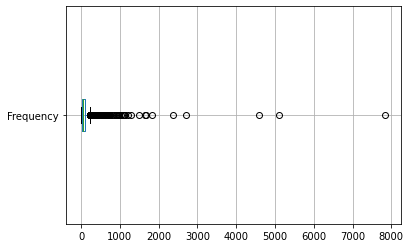

In [130]:
rfm.boxplot(column=['Frequency'], vert=False)

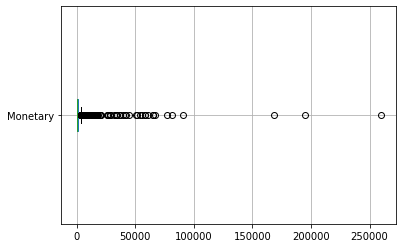

In [131]:
rfm.boxplot(column=['Monetary'], vert=False)

#Modeling Using K-Means

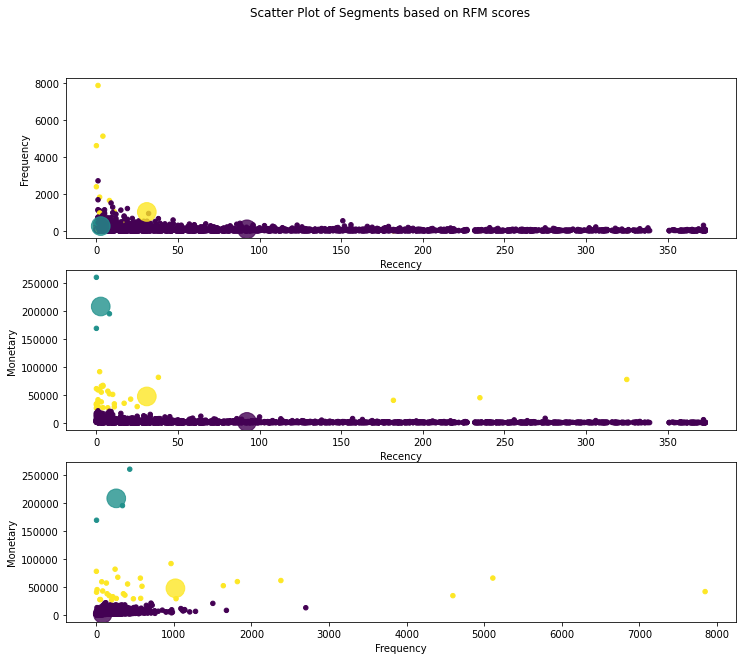

In [124]:
from sklearn.cluster import KMeans

k= 3

model =KMeans(n_clusters=k, random_state=0)
model.fit(rfm)



# Review output cluster labels
cluster_labels = model.labels_

centroids = model.cluster_centers_

rfm ['Clusters']= cluster_labels

# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

rfm.plot.scatter(x = 'Recency', y = 'Frequency', c=rfm['Clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

rfm.plot.scatter(x = 'Recency', y = 'Monetary', c=rfm['Clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

rfm.plot.scatter(x = 'Frequency', y = 'Monetary', c=rfm['Clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');
